In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import GridSearchCV





In [3]:
data = pd.read_csv("Radisson Blu Seaside Hotel, Helsinki.csv")

data.head()

,Review_No,Page,Rating,Name,Country,Reviewed_Date,Room_Type,Nights,Check_In_Month,Travel_Type,Review_Details
0,1,1,10.0,Muhamad,Malaysia,Reviewed: 3 December 2021,Superior Room,1,November 2021,Group,A very pleasant stay Liked · Nice place to...
1,2,1,9.0,Nadiya,Czech Republic,Reviewed: 27 February 2023,Standard Room,1,February 2023,Couple,Superb Liked · We had a lovely room with h...
2,3,1,9.0,Alexandre,Brazil,Reviewed: 26 February 2023,Standard Room,3,February 2023,Family,"Superb Liked · Staff is very nice, room wa..."
3,4,1,8.0,Helen,United Kingdom,Reviewed: 21 February 2023,Standard Room,3,February 2023,Group,"Fantastic Liked · Fantastic location, shor..."
4,5,1,9.0,Asia,United Kingdom,Reviewed: 17 February 2023,Standard Room,1,February 2023,Solo traveller,Nice clean hotel with friendly people Liked...


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_No       5885 non-null   int64  
 1   Page            5885 non-null   int64  
 2   Rating          5885 non-null   float64
 3   Name            5885 non-null   object 
 4   Country         5876 non-null   object 
 5   Reviewed_Date   5885 non-null   object 
 6   Room_Type       5472 non-null   object 
 7   Nights          5885 non-null   int64  
 8   Check_In_Month  5885 non-null   object 
 9   Travel_Type     5885 non-null   object 
 10  Review_Details  5885 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 505.9+ KB


#  Data Cleaning and Data Preprocessing

In [258]:
# drop rows that has null values
data = data.dropna()

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5464 entries, 0 to 5692
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_No       5464 non-null   int64  
 1   Page            5464 non-null   int64  
 2   Rating          5464 non-null   float64
 3   Name            5464 non-null   object 
 4   Country         5464 non-null   object 
 5   Reviewed_Date   5464 non-null   object 
 6   Room_Type       5464 non-null   object 
 7   Nights          5464 non-null   int64  
 8   Check_In_Month  5464 non-null   object 
 9   Travel_Type     5464 non-null   object 
 10  Review_Details  5464 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 512.2+ KB


In [ ]:
data_m=data.drop(["Review_No","Page","Name","Reviewed_Date","Review_Details"],axis=1)

In [288]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November 2021,Group
1,9.0,Czech Republic,Standard Room,1,February 2023,Couple
2,9.0,Brazil,Standard Room,3,February 2023,Family
3,8.0,United Kingdom,Standard Room,3,February 2023,Group
4,9.0,United Kingdom,Standard Room,1,February 2023,Solo traveller


# Country and Rating

In [278]:
data_m.Country.value_counts()[:15]

# Country
# Finland           8.428432
# Germany           8.073105
# Estonia           8.584058
# Russia            8.505759
# Italy             8.321429
# United Kingdom    8.288732
# Sweden            8.254198
# Spain             8.120000
# France            8.464912
# Latvia            8.884112

Finland           2761
Germany            409
Estonia            276
Russia             191
Italy              154
United Kingdom     142
Sweden             131
Spain              125
France             114
Latvia             107
Switzerland         86
Poland              81
Lithuania           74
Netherlands         56
Belgium             51
Name: Country, dtype: int64

In [69]:
print ("Guests are from", len(data_m.Country.unique()),"countries.\n")
print ("The",len(data_m.Country.unique()),"countries are: ", data_m.Country.unique())


Guests are from 91 countries.

The 91 countries are:  ['Malaysia' 'Czech Republic' 'Brazil' 'United Kingdom' 'Finland' 'Ireland'
 'Estonia' 'India' 'Croatia' 'United States' 'Australia' 'Sweden' 'Russia'
 'Italy' 'Netherlands' 'Switzerland' 'Hong Kong' 'Slovakia' 'Latvia'
 'Poland' 'Qatar' 'Cyprus' 'Germany' 'Portugal' 'Canada' 'Taiwan'
 'Hungary' 'Singapore' 'Mexico' 'France' 'Kenya' 'United Arab Emirates'
 'Romania' 'Norway' 'Spain' 'Saudi Arabia' 'Lithuania' 'Pakistan'
 'Azerbaijan' 'Belgium' 'Israel' 'Turkey' 'Greece' 'Austria' 'Egypt'
 'Bulgaria' 'Malta' 'Iceland' 'Thailand' 'South Africa' 'Nigeria'
 'Denmark' 'South Korea' 'Iran' 'China' 'Philippines' 'Lebanon' 'Chile'
 'Indonesia' 'Madagascar' 'Argentina' 'Belarus' 'Georgia' 'Morocco' 'Peru'
 'Kazakhstan' 'Ukraine' 'Slovenia' 'Montenegro' 'Moldova' 'Colombia'
 'Luxembourg' 'Japan' 'Dominican Republic' 'Guatemala' 'Uzbekistan'
 'Abkhazia, \u200bGeorgia' 'Albania' 'Kuwait' 'Oman' 'Serbia'
 'Sierra Leone' 'New Zealand' 'Ecuador' 'J

In [70]:
country_data = pd.DataFrame(data_m.groupby('Country').count())
country_data.head()

,Rating,Room_Type,Nights,Check_In_Month,Travel_Type
Country,,,,,
"Abkhazia, ​Georgia",1,1,1,1,1
Albania,1,1,1,1,1
Argentina,2,2,2,2,2
Australia,17,17,17,17,17
Austria,46,46,46,46,46


In [72]:
country = country_data.index
country_cnt = country_data['Rating']
country_cnt


Country
Abkhazia, ​Georgia        1
Albania                   1
Argentina                 2
Australia                17
Austria                  46
                       ... 
United Arab Emirates     17
United Kingdom          142
United States            50
Uruguay                   1
Uzbekistan                1
Name: Rating, Length: 91, dtype: int64

<BarContainer object of 10 artists>

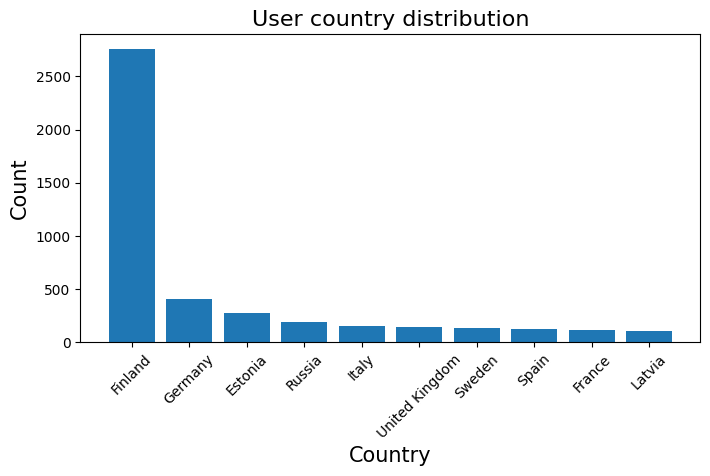

In [77]:
# Create a bar plot to show the number of users from each country.
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
country_sort = country_cnt.sort_values(ascending=False).index[:10]
country_sort_cnt = country_cnt.sort_values(ascending=False).values[:10]
plt.xlabel("Country",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("User country distribution", fontsize=16)
plt.bar(country_sort, country_sort_cnt)
# plt.savefig('./pic/coutry_cnt.jpg')

In [89]:
data_m.groupby("Country").Rating.mean().sort_values(ascending =False)[:20]

Country
Abkhazia, ​Georgia     10.000000
Guatemala              10.000000
Trinidad and Tobago    10.000000
Reunion                10.000000
Lebanon                10.000000
Uzbekistan             10.000000
Colombia                9.500000
Kenya                   9.500000
Montenegro              9.500000
Taiwan                  9.333333
Singapore               9.285714
Canada                  9.200000
Indonesia               9.166667
South Korea             9.166667
Croatia                 9.125000
Pakistan                9.000000
Oman                    9.000000
Slovakia                9.000000
Moldova                 9.000000
Albania                 9.000000
Name: Rating, dtype: float64

In [96]:
Top10CountrylIST = list(country_sort)

In [97]:
Country_s = data_m.groupby("Country").Rating.mean()
Country_s.loc[Top10CountrylIST]

Country
Finland           8.428432
Germany           8.073105
Estonia           8.584058
Russia            8.505759
Italy             8.321429
United Kingdom    8.288732
Sweden            8.254198
Spain             8.120000
France            8.464912
Latvia            8.884112
Name: Rating, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Finland'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Estonia'),
  Text(3, 0, 'Russia'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Latvia')])

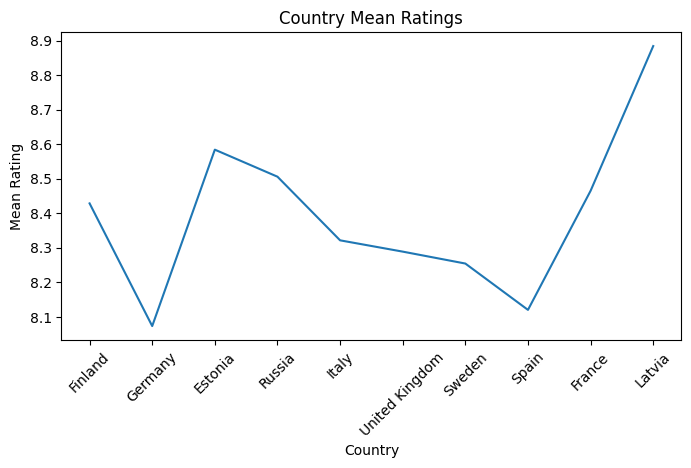

In [109]:
plt.figure(figsize=(8, 4))

ax =  Country_s.loc[Top10CountrylIST].plot(kind="line")
ax.set_xlabel('Country')
ax.set_ylabel('Mean Rating')
ax.set_title('Country Mean Ratings')
ax.set_xticks(range(len(Top10CountrylIST)))
ax.set_xticklabels(Country_s.loc[Top10CountrylIST].index)
plt.xticks(rotation=45)



In [143]:
Country_counts = data_m['Country'].value_counts(ascending =False)[:10]
Country_means = Country_s.loc[Top10CountrylIST]
Country_data = pd.DataFrame({'count': Country_counts, 'mean_rating': Country_means})


In [144]:
Country_data

,count,mean_rating
Finland,2761,8.428432
Germany,409,8.073105
Estonia,276,8.584058
Russia,191,8.505759
Italy,154,8.321429
United Kingdom,142,8.288732
Sweden,131,8.254198
Spain,125,8.120000
France,114,8.464912
Latvia,107,8.884112


In [145]:
corr_coef = Country_data['count'].corr(Country_data['mean_rating'])
print('Correlation Coefficient:', corr_coef)


Correlation Coefficient: 0.01491394445667107


# Room_Type and Rating

In [110]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November 2021,Group
1,9.0,Czech Republic,Standard Room,1,February 2023,Couple
2,9.0,Brazil,Standard Room,3,February 2023,Family
3,8.0,United Kingdom,Standard Room,3,February 2023,Group
4,9.0,United Kingdom,Standard Room,1,February 2023,Solo traveller


In [111]:
data_m.Room_Type.value_counts()

Standard Room        3478
Superior Room        1799
Business Room         110
One-Bedroom Suite      74
Executive Suite         3
Name: Room_Type, dtype: int64

In [149]:
data_m.Room_Type.value_counts().values.sum()

5464

In [151]:
(3478+1799)

5277

In [150]:
(3478+1799)/data_m.Room_Type.value_counts().values.sum()

0.9657759882869692

In [112]:
Room_Type_rating = data_m.groupby("Room_Type").Rating.mean()
Room_Type_rating

Room_Type
Business Room         8.423636
Executive Suite      10.000000
One-Bedroom Suite     8.500000
Standard Room         8.265009
Superior Room         8.669705
Name: Rating, dtype: float64

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Standard Room'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Superior Room'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Business Room'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'One-Bedroom Suite'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'Executive Suite'),
  Text(4.5, 0, '')])

<Figure size 800x400 with 0 Axes>

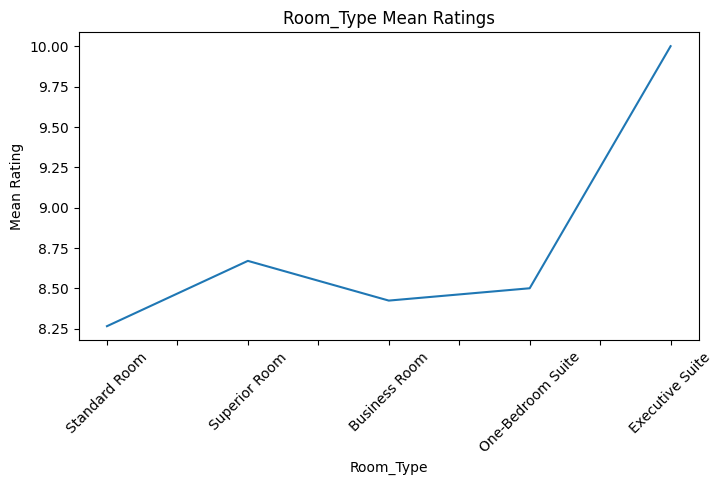

In [132]:
plt.figure(figsize=(8, 4))



room_type_order = ['Standard Room', 'Superior Room', 'Business Room','One-Bedroom Suite','Executive Suite']

Room_Type_rating_sorted = Room_Type_rating.reindex(room_type_order)

plt.figure(figsize=(8, 4))

ax =  Room_Type_rating_sorted.plot(kind="line")
ax.set_xlabel('Room_Type')
ax.set_ylabel('Mean Rating')
ax.set_title('Room_Type Mean Ratings')

plt.xticks(rotation=45)


<BarContainer object of 5 artists>

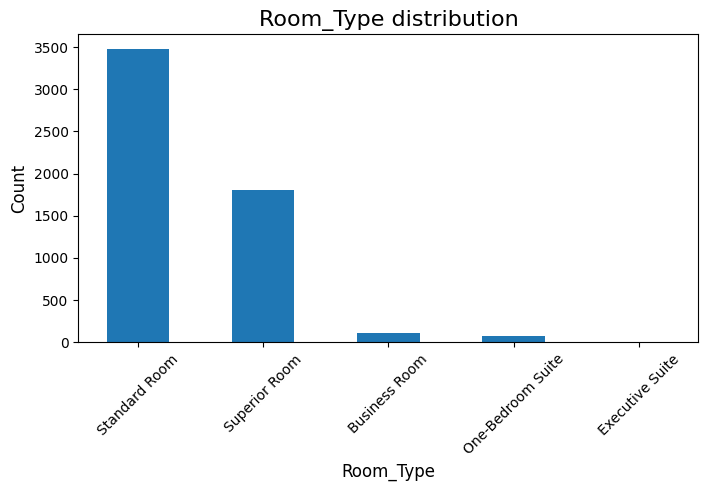

In [124]:
# Create a bar plot to show the number of users of different Room_Type.
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
Room_Type_sort = data_m.Room_Type.value_counts().sort_values(ascending=False).index
Room_Type_sort_cnt = data_m.Room_Type.value_counts().sort_values(ascending=False).values
plt.xlabel("Room_Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Room_Type distribution", fontsize=16)
plt.bar(Room_Type_sort, Room_Type_sort_cnt,width=0.5)
# plt.savefig('./pic/coutry_cnt.jpg')

In [136]:
room_type_counts = data_m['Room_Type'].value_counts()
room_type_means = data_m.groupby('Room_Type')['Rating'].mean()
room_type_data = pd.DataFrame({'count': room_type_counts, 'mean_rating': room_type_means})
corr_coef = room_type_data['count'].corr(room_type_data['mean_rating'])
print('Correlation Coefficient:', corr_coef)


In [140]:
corr_coef = room_type_data['count'].corr(room_type_data['mean_rating'])
print('Correlation Coefficient:', corr_coef)


Correlation Coefficient: -0.4652474708449097


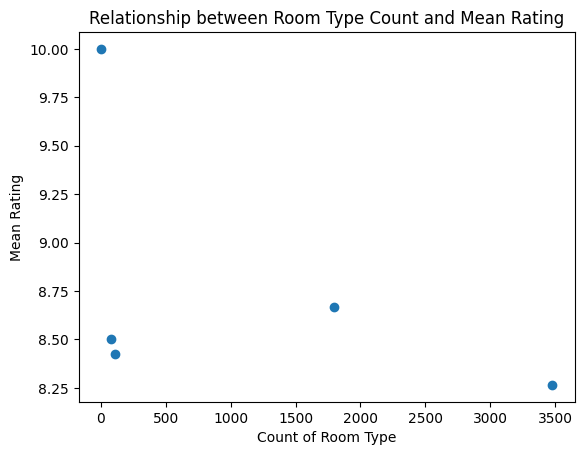

In [135]:
import matplotlib.pyplot as plt

plt.scatter(room_type_data['count'], room_type_data['mean_rating'])
plt.xlabel('Count of Room Type')
plt.ylabel('Mean Rating')
plt.title('Relationship between Room Type Count and Mean Rating')
plt.show()


# Travel_Type and Rating

In [262]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November 2021,Group
1,9.0,Czech Republic,Standard Room,1,February 2023,Couple
2,9.0,Brazil,Standard Room,3,February 2023,Family
3,8.0,United Kingdom,Standard Room,3,February 2023,Group
4,9.0,United Kingdom,Standard Room,1,February 2023,Solo traveller


In [154]:
data_m.Travel_Type.value_counts()

Family            2148
Couple            1700
Group              810
Solo traveller     806
Name: Travel_Type, dtype: int64

In [155]:
Travel_Type_rating = data_m.groupby("Travel_Type").Rating.mean()
Travel_Type_rating

Travel_Type
Couple            8.253235
Family            8.554935
Group             8.473827
Solo traveller    8.260298
Name: Rating, dtype: float64

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Family'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Couple'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Group'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Solo traveller'),
  Text(3.5, 0, '')])

<Figure size 800x400 with 0 Axes>

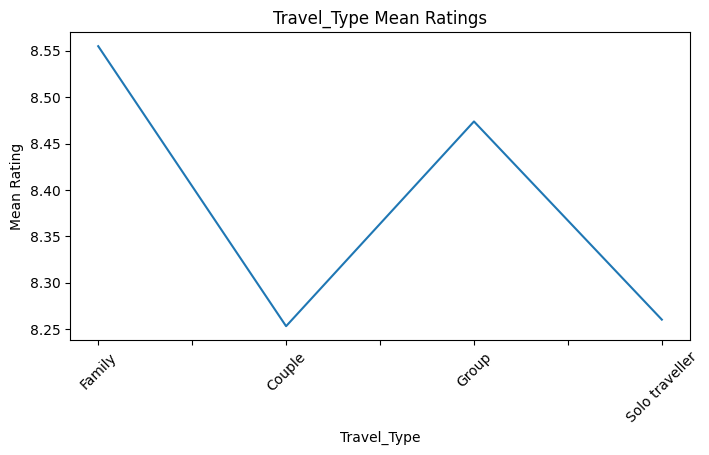

In [157]:
plt.figure(figsize=(8, 4))



travel_type_order = ['Family', 'Couple', 'Group','Solo traveller']

travel_type_rating_sorted = Travel_Type_rating.reindex(travel_type_order)

plt.figure(figsize=(8, 4))

ax =  travel_type_rating_sorted.plot(kind="line")
ax.set_xlabel('Travel_Type')
ax.set_ylabel('Mean Rating')
ax.set_title('Travel_Type Mean Ratings')

plt.xticks(rotation=45)


<BarContainer object of 4 artists>

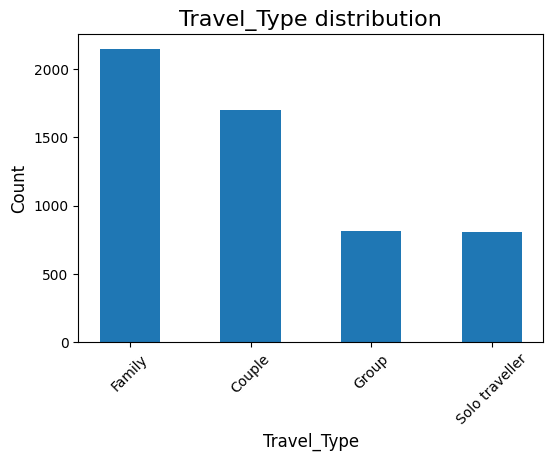

In [159]:
# Create a bar plot to show the number of users of each Travel_Type.
plt.figure(figsize=(6, 4))
plt.xticks(rotation=45)
Travel_Type_sort = data_m.Travel_Type.value_counts().sort_values(ascending=False).index
Travel_Type_sort_cnt = data_m.Travel_Type.value_counts().sort_values(ascending=False).values
plt.xlabel("Travel_Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Travel_Type distribution", fontsize=16)
plt.bar(Travel_Type_sort, Travel_Type_sort_cnt,width=0.5)
# plt.savefig('./pic/coutry_cnt.jpg')

In [160]:
travel_type_counts = data_m['Travel_Type'].value_counts()
travel_type_means = data_m.groupby('Travel_Type')['Rating'].mean()
travel_type_data = pd.DataFrame({'count': travel_type_counts, 'mean_rating': travel_type_means})
corr_coef = travel_type_data['count'].corr(travel_type_data['mean_rating'])
print('Correlation Coefficient:', corr_coef)


Correlation Coefficient: 0.35700507729845254


# Check_In_Month and Rating

In [161]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November 2021,Group
1,9.0,Czech Republic,Standard Room,1,February 2023,Couple
2,9.0,Brazil,Standard Room,3,February 2023,Family
3,8.0,United Kingdom,Standard Room,3,February 2023,Group
4,9.0,United Kingdom,Standard Room,1,February 2023,Solo traveller


In [263]:
data_m["Check_In_Month"]=data_m["Check_In_Month"].map(lambda x: x[:-5])
data_m["Check_In_Month"]=data_m["Check_In_Month"].str.replace("\xa0","",regex=True)
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November,Group
1,9.0,Czech Republic,Standard Room,1,February,Couple
2,9.0,Brazil,Standard Room,3,February,Family
3,8.0,United Kingdom,Standard Room,3,February,Group
4,9.0,United Kingdom,Standard Room,1,February,Solo traveller


In [169]:
print(data_m.Check_In_Month.value_counts())

 July         1045
 August        940
 September     472
 October       469
 June          455
 November      332
 December      316
 February      314
 January       291
 May           288
 March         283
 April         259
Name: Check_In_Month, dtype: int64


In [264]:
data_m["Check_In_Month"]=data_m["Check_In_Month"].str.replace("\xa0","",regex=True)

In [165]:
month_rating = data_m.groupby("Check_In_Month").Rating.mean().sort_values(ascending=False)
month_rating

Check_In_Month
 March        8.778445
 January      8.656357
 February     8.608917
 April        8.577606
 May          8.551736
 December     8.484177
 June         8.409890
 August       8.348936
 November     8.334337
 September    8.299788
 July         8.259713
 October      8.242431
Name: Rating, dtype: float64

In [177]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cnt = data_m.Check_In_Month.value_counts().reindex(month_order)
month_cnt.sort_values(ascending =False)

July         1045
August        940
September     472
October       469
June          455
November      332
December      316
February      314
January       291
May           288
March         283
April         259
Name: Check_In_Month, dtype: int64

<BarContainer object of 12 artists>

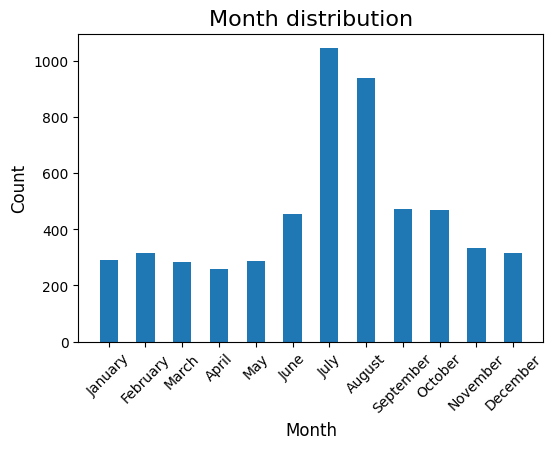

In [172]:
# Create a bar plot to show the number of users from each country.
plt.figure(figsize=(6, 4))
plt.xticks(rotation=45)
month_sort = month_cnt.index
month_sort_cnt = month_cnt.values
plt.xlabel("Month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Month distribution", fontsize=16)
plt.bar(month_sort, month_sort_cnt,width=0.5)
# plt.savefig('./pic/coutry_cnt.jpg')

In [173]:
month_cnt.mean()

455.3333333333333

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

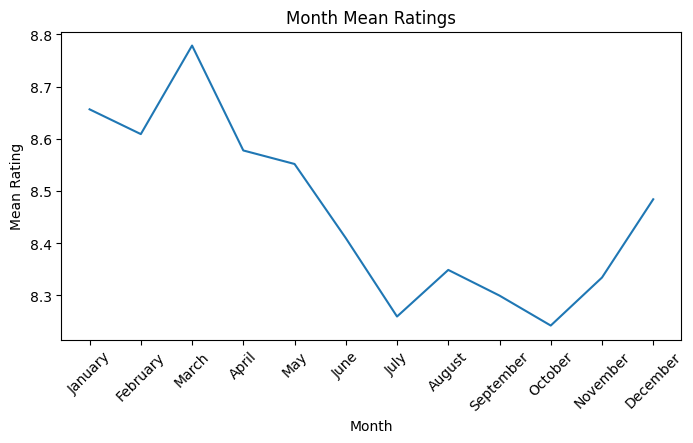

In [176]:
month_rating = data_m.groupby("Check_In_Month").Rating.mean().sort_values(ascending=False)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


month_rating_sorted = month_rating.reindex(month_order)


plt.figure(figsize=(8, 4))

ax =  month_rating_sorted.plot(kind="line")
ax.set_xlabel('Month')
ax.set_ylabel('Mean Rating')
ax.set_title('Month Mean Ratings')

ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

plt.xticks(rotation=45)


# Nights and Rating

In [265]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Malaysia,Superior Room,1,November,Group
1,9.0,Czech Republic,Standard Room,1,February,Couple
2,9.0,Brazil,Standard Room,3,February,Family
3,8.0,United Kingdom,Standard Room,3,February,Group
4,9.0,United Kingdom,Standard Room,1,February,Solo traveller


In [179]:
data_m.Nights.value_counts()

1     3206
2     1413
3      486
4      210
5       80
6       29
7       25
8        7
9        2
11       2
12       2
17       1
16       1
Name: Nights, dtype: int64

In [209]:
486+210+80+29+25+7+2+2+2+1+1

845

In [214]:
845/5464

0.15464860907759884

In [217]:
1413/5464

0.258601756954612

In [203]:
3206/5464

0.5867496339677891

<BarContainer object of 10 artists>

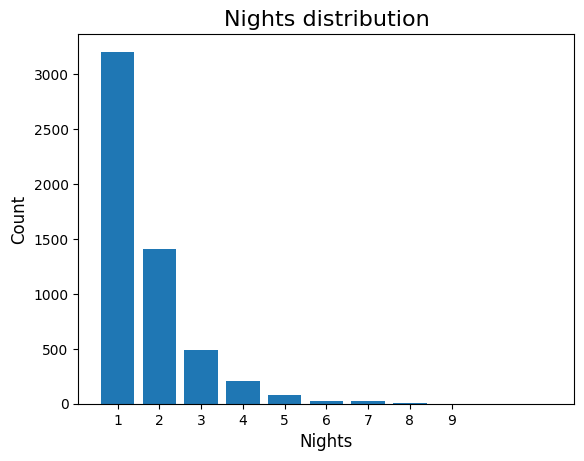

In [194]:
# Create a bar plot to show the number of users from each country.
# plt.figure(figsize=(6, 4))
# plt.xticks(rotation=45)
nights_sort = data_m.Nights.value_counts()[:10].index
nights_sort_cnt = data_m.Nights.value_counts()[:10].values
plt.xlabel("Nights",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Nights distribution", fontsize=16)
plt.xticks(range(1, 10))
plt.bar(nights_sort, nights_sort_cnt,width=0.8)
# plt.savefig('./pic/coutry_cnt.jpg')


In [192]:
nights_rating = data_m.groupby("Nights").Rating.mean().sort_values(ascending=False)
nights_rating


Nights
9     9.000000
1     8.455989
2     8.404671
12    8.300000
3     8.268107
4     8.252381
6     8.103448
5     8.025000
17    8.000000
7     7.860000
8     7.714286
11    7.000000
16    7.000000
Name: Rating, dtype: float64

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(16, 0, '16'),
 Text(17, 0, '17')]

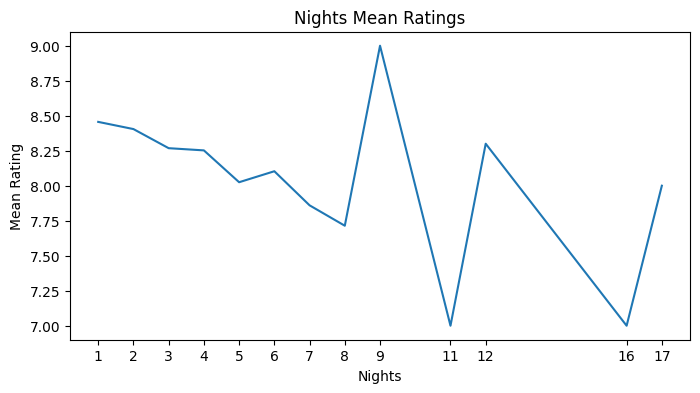

In [247]:
nights_rating = data_m.groupby("Nights").Rating.mean()

nights_order = [1,2,3,4,5,6,7,8,9,11,12,16,17]


nights_rating_sorted = nights_rating.reindex(nights_order)


plt.figure(figsize=(8, 4))

ax =  nights_rating_sorted.plot(kind="line")
ax.set_xlabel('Nights')
ax.set_ylabel('Mean Rating')
ax.set_title('Nights Mean Ratings')


# new_ticks = np.linspace(min(nights_order), max(nights_order), len(nights_order))

ax.set_xticks(nights_order)


ax.set_xticklabels(nights_order)

# # plt.xticks(rotation=45)


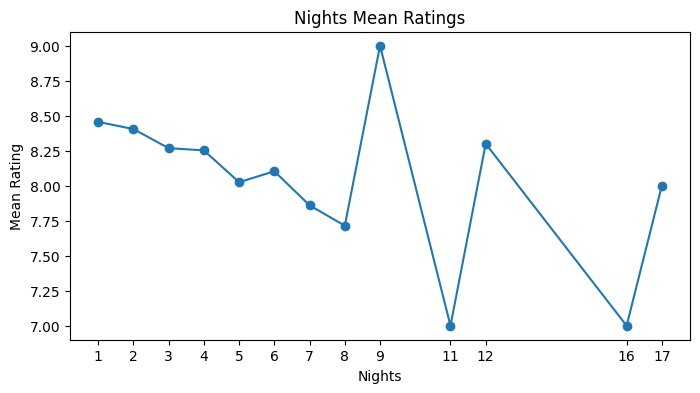

In [249]:
import numpy as np
import matplotlib.pyplot as plt

nights_rating = data_m.groupby("Nights").Rating.mean()
nights_order = [1,2,3,4,5,6,7,8,9,11,12,16,17]
nights_rating_sorted = nights_rating.reindex(nights_order)

# Create a new range of evenly spaced x-axis values
new_nights_order = [n for n in range(min(nights_order), max(nights_order) + 1) if n not in [10, 13, 14, 15]]
new_nights_rating = np.interp(new_nights_order, nights_rating_sorted.index, nights_rating_sorted)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(new_nights_order, new_nights_rating, '-o')
plt.xlabel('Nights')
plt.ylabel('Mean Rating')
plt.title('Nights Mean Ratings')

# Set the tick locations and labels for the x-axis
plt.xticks(new_nights_order, new_nights_order)

plt.show()


<Axes: >

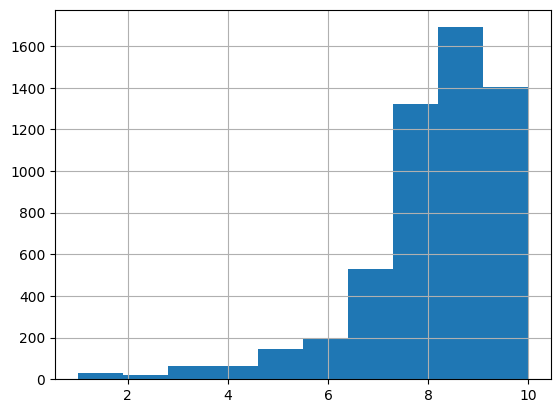

In [15]:
data_m.Rating.hist()

1     3206
2     1413
3      486
4      210
5       80
6       29
7       25
8        7
9        2
11       2
12       2
17       1
16       1
Name: Nights, dtype: int64

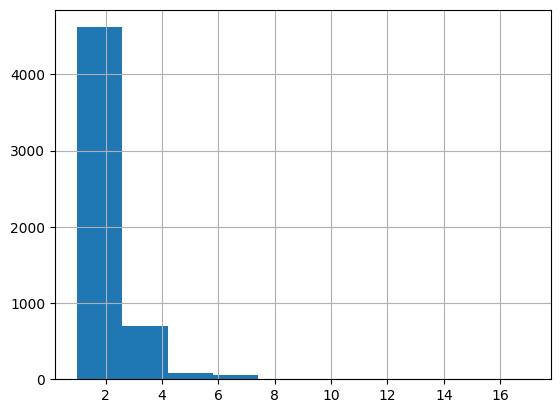

In [17]:
data_m.Nights.hist()
data_m.Nights.value_counts()

In [18]:
data_m.Country.value_counts()

Finland               2761
Germany                409
Estonia                276
Russia                 191
Italy                  154
                      ... 
Abkhazia, ​Georgia       1
Uzbekistan               1
Peru                     1
Madagascar               1
Reunion                  1
Name: Country, Length: 91, dtype: int64

In [19]:
len(data_m[data_m.Country!="Finland"].Country)
# 750 reviews are not from UK.
# 5757 reviews from UK

2703

In [12]:
# replace foreign countries

In [13]:

# 1. data_m.Guest_Region.mask(data_m.Guest_Region != "United Kingdom", "Other", inplace = True)

In [20]:
# 2. based on value_counts()

filter = data_m.Country.value_counts()
data_m.loc[data_m.Country.isin(filter[filter<1000].index),"Country"] = "Others"

In [21]:
data_m.Country.value_counts()

Finland    2761
Others     2703
Name: Country, dtype: int64

In [22]:
data_m

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Others,Superior Room,1,November 2021,Group
1,9.0,Others,Standard Room,1,February 2023,Couple
2,9.0,Others,Standard Room,3,February 2023,Family
3,8.0,Others,Standard Room,3,February 2023,Group
4,9.0,Others,Standard Room,1,February 2023,Solo traveller
...,...,...,...,...,...,...
5688,10.0,Others,Standard Room,1,November 2021,Solo traveller
5689,1.0,Finland,Standard Room,1,June 2021,Family
5690,6.0,Finland,Superior Room,1,November 2020,Couple
5691,10.0,Finland,One-Bedroom Suite,1,October 2020,Couple


In [23]:
data_m.Room_Type.value_counts()

Standard Room        3478
Superior Room        1799
Business Room         110
One-Bedroom Suite      74
Executive Suite         3
Name: Room_Type, dtype: int64

In [24]:
data_m.loc[data_m.Room_Type.str.contains("Suite"),"Room_Type"] = "Suite"


In [25]:
data_m.Room_Type.value_counts()

Standard Room    3478
Superior Room    1799
Business Room     110
Suite              77
Name: Room_Type, dtype: int64

In [26]:
data_m.Nights.value_counts()

1     3206
2     1413
3      486
4      210
5       80
6       29
7       25
8        7
9        2
11       2
12       2
17       1
16       1
Name: Nights, dtype: int64

In [27]:
data_m.Nights.mean()

1.6896046852122988

In [28]:
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Others,Superior Room,1,November 2021,Group
1,9.0,Others,Standard Room,1,February 2023,Couple
2,9.0,Others,Standard Room,3,February 2023,Family
3,8.0,Others,Standard Room,3,February 2023,Group
4,9.0,Others,Standard Room,1,February 2023,Solo traveller


In [29]:
data_m["Check_In_Month"]=data_m["Check_In_Month"].map(lambda x: x[:-5])
data_m.head()

,Rating,Country,Room_Type,Nights,Check_In_Month,Travel_Type
0,10.0,Others,Superior Room,1,November,Group
1,9.0,Others,Standard Room,1,February,Couple
2,9.0,Others,Standard Room,3,February,Family
3,8.0,Others,Standard Room,3,February,Group
4,9.0,Others,Standard Room,1,February,Solo traveller


In [31]:
data_m.Nights.value_counts()

1     3206
2     1413
3      486
4      210
5       80
6       29
7       25
8        7
9        2
11       2
12       2
17       1
16       1
Name: Nights, dtype: int64

In [30]:
data_m.Check_In_Month.value_counts()

 July         1045
 August        940
 September     472
 October       469
 June          455
 November      332
 December      316
 February      314
 January       291
 May           288
 March         283
 April         259
Name: Check_In_Month, dtype: int64

In [31]:
bins = [0,8.4,10.0]
class_name=[0,1]
rating_cat=pd.cut(data_m.Rating,bins,labels=class_name)
data_m["rating_cat"]=rating_cat
data_m=data_m.drop(["Rating"],axis=1)


In [32]:
data_m.head()

,Country,Room_Type,Nights,Check_In_Month,Travel_Type,rating_cat
0,Others,Superior Room,1,November,Group,1
1,Others,Standard Room,1,February,Couple,1
2,Others,Standard Room,3,February,Family,1
3,Others,Standard Room,3,February,Group,0
4,Others,Standard Room,1,February,Solo traveller,1


In [33]:
import itertools

# Get all possible subset of categorical columns to get_dummies.
cvar_list=["Country","Room_Type","Travel_Type","Check_In_Month"]
cvar_list_subsets = []
for i in range(0, len(cvar_list) + 1):
    cvar_list_subsets += [list(x) for x in itertools.combinations(cvar_list, i)]

# print the subsets
print(cvar_list_subsets)
print (len(cvar_list_subsets))

[[], ['Country'], ['Room_Type'], ['Travel_Type'], ['Check_In_Month'], ['Country', 'Room_Type'], ['Country', 'Travel_Type'], ['Country', 'Check_In_Month'], ['Room_Type', 'Travel_Type'], ['Room_Type', 'Check_In_Month'], ['Travel_Type', 'Check_In_Month'], ['Country', 'Room_Type', 'Travel_Type'], ['Country', 'Room_Type', 'Check_In_Month'], ['Country', 'Travel_Type', 'Check_In_Month'], ['Room_Type', 'Travel_Type', 'Check_In_Month'], ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month']]
16


In [40]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# build XGboost models to try all possible categorical columns combination together with column Nights.  

n=0

for e in cvar_list_subsets:
    n+=1
    print ("The ", n, "Model. Predictors include categorical variables",e, "and Nights.")
    data_m_c = data_m.copy()
    
    # 
    for var in e:        
        dummies_set = pd.get_dummies(data_m_c[var], drop_first=True, prefix = var)
        data_m_c = pd.concat([data_m_c, dummies_set], axis = 1).drop(var, axis = 1)
    # print (data_m_c.colums.values)
    cvar_list_r = [x for x in cvar_list if x not in e]
    # print (cvar_list_r)
    data_m_c.drop(cvar_list_r,axis=1,inplace = True)
    # print (data_m_c.head())

    # split data for with all columns. 

    col_list = list(data_m_c.columns)
    col_list.remove("rating_cat")
    X = data_m_c[col_list]
    y = data_m_c["rating_cat"]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Optimize the xgboost model.

    # Define the hyperparameter grid to search
    param_grid = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l1', 'l2']}

    
    


    # Create an logistic regression classifier
    LR_model =  LogisticRegression(random_state=42)

#     # define recall for class 0.
#     def recall_0(y_test, y_pred):
#         cm = confusion_matrix(y_test, y_pred)
#         return cm[0][0]/(cm[0][0]+cm[0][1])

#     my_scorer = make_scorer(recall_0, greater_is_better=True)

    def TN_score (y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        # tn, fp, fn, tp = cm.ravel()
#         recall_0 = cm[0][0]/(cm[0][0]+cm[0][1])
#         tn_fn_ratio = cm[0][0]/ cm[1][0]
        return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
    
    my_scorer = make_scorer(TN_score, greater_is_better=True)


    
    # Perform grid search on the classifier
    grid_search = GridSearchCV(LR_model, param_grid, scoring=my_scorer, cv=30)
    grid_search.fit(X_train, y_train)

    print("Best Hyperparameters: ", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print ("best score:" , (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0]) )
    print("Confusion Matrix:")
    print(cm)
    # print(classification_report(y_test,y_pred))
    print ("\n")
    print ("*"*60)
    




The  1 Model. Predictors include categorical variables [] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(c

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 58.17%
              precision    recall  f1-score   support

           0       0.44      0.06      0.10       338
           1       0.59      0.95      0.73       482

    accuracy                           0.58       820
   macro avg       0.52      0.50      0.42       820
weighted avg       0.53      0.58      0.47       820

best score: 0.047337278106508875
Confusion Matrix:
[[ 20 318]
 [ 25 457]]


************************************************************
The  2 Model. Predictors include categorical variables ['Country'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(c

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 58.17%
              precision    recall  f1-score   support

           0       0.44      0.06      0.10       338
           1       0.59      0.95      0.73       482

    accuracy                           0.58       820
   macro avg       0.52      0.50      0.42       820
weighted avg       0.53      0.58      0.47       820

best score: 0.047337278106508875
Confusion Matrix:
[[ 20 318]
 [ 25 457]]


************************************************************
The  3 Model. Predictors include categorical variables ['Room_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-pac

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  4 Model. Predictors include categorical variables ['Travel_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(c

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 58.90%
              precision    recall  f1-score   support

           0       0.50      0.21      0.30       338
           1       0.61      0.85      0.71       482

    accuracy                           0.59       820
   macro avg       0.56      0.53      0.50       820
weighted avg       0.56      0.59      0.54       820

best score: 0.21306001690617074
Confusion Matrix:
[[ 71 267]
 [ 70 412]]


************************************************************
The  5 Model. Predictors include categorical variables ['Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(c

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.27%
              precision    recall  f1-score   support

           0       0.52      0.13      0.21       338
           1       0.60      0.91      0.73       482

    accuracy                           0.59       820
   macro avg       0.56      0.52      0.47       820
weighted avg       0.57      0.59      0.51       820

best score: 0.1461249819598788
Confusion Matrix:
[[ 45 293]
 [ 41 441]]


************************************************************
The  6 Model. Predictors include categorical variables ['Country', 'Room_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_m

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  7 Model. Predictors include categorical variables ['Country', 'Travel_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.54%
              precision    recall  f1-score   support

           0       0.46      0.04      0.07       338
           1       0.59      0.97      0.73       482

    accuracy                           0.59       820
   macro avg       0.53      0.50      0.40       820
weighted avg       0.54      0.59      0.46       820

best score: 0.030431107354184278
Confusion Matrix:
[[ 12 326]
 [ 14 468]]


************************************************************
The  8 Model. Predictors include categorical variables ['Country', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(c

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.27%
              precision    recall  f1-score   support

           0       0.52      0.13      0.21       338
           1       0.60      0.91      0.73       482

    accuracy                           0.59       820
   macro avg       0.56      0.52      0.47       820
weighted avg       0.57      0.59      0.51       820

best score: 0.1461249819598788
Confusion Matrix:
[[ 45 293]
 [ 41 441]]


************************************************************
The  9 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_m

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  10 Model. Predictors include categorical variables ['Room_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_m

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  11 Model. Predictors include categorical variables ['Travel_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.54%
              precision    recall  f1-score   support

           0       0.46      0.03      0.06       338
           1       0.59      0.97      0.73       482

    accuracy                           0.59       820
   macro avg       0.52      0.50      0.40       820
weighted avg       0.54      0.59      0.46       820

best score: 0.02753755120619026
Confusion Matrix:
[[ 11 327]
 [ 13 469]]


************************************************************
The  12 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-pac

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  13 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_m

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.54      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.04750164365548981
Confusion Matrix:
[[ 17 321]
 [ 18 464]]


************************************************************
The  14 Model. Predictors include categorical variables ['Country', 'Travel_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.41%
              precision    recall  f1-score   support

           0       0.44      0.03      0.06       338
           1       0.59      0.97      0.73       482

    accuracy                           0.58       820
   macro avg       0.51      0.50      0.40       820
weighted avg       0.53      0.58      0.46       820

best score: 0.025570583262890953
Confusion Matrix:
[[ 11 327]
 [ 14 468]]


************************************************************
The  15 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-pac

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.55      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.05029585798816568
Confusion Matrix:
[[ 17 321]
 [ 17 465]]


************************************************************
The  16 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month'] and Nights.


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/2986717796.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])


Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       338
           1       0.59      0.96      0.73       482

    accuracy                           0.59       820
   macro avg       0.55      0.51      0.41       820
weighted avg       0.55      0.59      0.47       820

best score: 0.05029585798816568
Confusion Matrix:
[[ 17 321]
 [ 17 465]]


************************************************************


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", li

In [38]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# build XGboost models to try all possible categorical columns combination together with column Nights.  

n=0

for e in cvar_list_subsets[1:]:
    n+=1
    print ("The ", n, "Model. Predictors include categorical variables",e)
    data_m_c = data_m.copy()
    
    # 
    for var in e:        
        dummies_set = pd.get_dummies(data_m_c[var], drop_first=True, prefix = var)
        data_m_c = pd.concat([data_m_c, dummies_set], axis = 1).drop(var, axis = 1)
    print (data_m_c.columns.values)
    cvar_list_r = [x for x in cvar_list if x not in e]
    print (cvar_list_r)
    data_m_c.drop(cvar_list_r,axis=1,inplace = True)
    data_m_c.drop("Nights",axis=1,inplace = True)

    print (data_m_c.head())

    # split data for with all columns. 

    col_list = list(data_m_c.columns)
    col_list.remove("rating_cat")
    X = data_m_c[col_list]
    y = data_m_c["rating_cat"]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Optimize the xgboost model.

    # Define the hyperparameter grid to search
    param_grid = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l1', 'l2']}

    


    # Create an XGBoost classifier
    LR_model =  LogisticRegression(random_state=42)

    def TN_score (y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        recall_0 = cm[0][0]/(cm[0][0]+cm[0][1])
        tn_fn_ratio = cm[0][0]/ cm[1][0]
        TN_score = recall_0*tn_fn_ratio
        return TN_score
    
    my_scorer = make_scorer(TN_score, greater_is_better=True)

    
    # Perform grid search on the classifier
    grid_search = GridSearchCV(LR_model, param_grid, scoring=my_scorer, cv=20)
    grid_search.fit(X_train, y_train)

    print("Best Hyperparameters: ", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print ("best score:" , (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0]) )
    print("Confusion Matrix:")
    print(cm)
    # print(classification_report(y_test,y_pred))
    print ("\n")
    print ("*"*60)




The  1 Model. Predictors include categorical variables ['Country']
['Room_Type' 'Nights' 'Check_In_Month' 'Travel_Type' 'rating_cat'
 'Country_Others']
['Room_Type', 'Travel_Type', 'Check_In_Month']
  rating_cat  Country_Others
0          1               1
1          1               1
2          1               1
3          0               1
4          1               1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  2 Model. Predictors include categorical variables ['Room_Type']
['Country' 'Nights' 'Check_In_Month' 'Travel_Type' 'rating_cat'
 'Room_Type_Standard Room' 'Room_Type_Suite' 'Room_Type_Superior Room']
['Country', 'Travel_Type', 'Check_In_Month']
  rating_cat  Room_Type_Standard Room  Room_Type_Suite  \
0          1                        0                0   
1          1                        1                0   
2          1                        1                0   
3

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbf

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  3 Model. Predictors include categorical variables ['Travel_Type']
['Country' 'Room_Type' 'Nights' 'Check_In_Month' 'rating_cat'
 'Travel_Type_Family' 'Travel_Type_Group' 'Travel_Type_Solo traveller']
['Country', 'Room_Type', 'Check_In_Month']
  rating_cat  Travel_Type_Family  Travel_Type_Group  \
0          1                   0                  1   
1          1                   0                  0   
2          1                   1                  0   
3          0   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbf

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  4 Model. Predictors include categorical variables ['Check_In_Month']
['Country' 'Room_Type' 'Nights' 'Travel_Type' 'rating_cat'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_\xa0March' 'Check_In_Month_\xa0May'
 'Check_In_Month_\xa0November' 'Check_In_Month_\xa0October'
 'Check_In_Month_\xa0September']
['Country', 'Room_Type', 'Travel

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbf

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  5 Model. Predictors include categorical variables ['Country', 'Room_Type']
['Nights' 'Check_In_Month' 'Travel_Type' 'rating_cat' 'Country_Others'
 'Room_Type_Standard Room' 'Room_Type_Suite' 'Room_Type_Superior Room']
['Travel_Type', 'Check_In_Month']
  rating_cat  Country_Others  Room_Type_Standard Room  Room_Type_Suite  \
0          1               1                        0                0   
1          1               1                        1                0   
2   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbf

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  6 Model. Predictors include categorical variables ['Country', 'Travel_Type']
['Room_Type' 'Nights' 'Check_In_Month' 'rating_cat' 'Country_Others'
 'Travel_Type_Family' 'Travel_Type_Group' 'Travel_Type_Solo traveller']
['Room_Type', 'Check_In_Month']
  rating_cat  Country_Others  Travel_Type_Family  Travel_Type_Group  \
0          1               1                   0                  1   
1          1               1                   0                  0   
2          1     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbf

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 58.90%
              precision    recall  f1-score   support

           0       0.51      0.15      0.23       338
           1       0.60      0.90      0.72       482

    accuracy                           0.59       820
   macro avg       0.55      0.52      0.47       820
weighted avg       0.56      0.59      0.52       820

best score: 0.15094795314575535
Confusion Matrix:
[[ 50 288]
 [ 49 433]]


************************************************************
The  7 Model. Predictors include categorical variables ['Country', 'Check_In_Month']
['Room_Type' 'Nights' 'Travel_Type' 'rating_cat' 'Country_Others'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_\xa0March' 'Check_In_Month_\xa0May'
 'Check_In_Month_\xa0November' 'Check_In_Month_\xa0October'
 'Check_In_Month_\xa0September']

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 58.29%
              precision    recall  f1-score   support

           0       0.42      0.03      0.06       338
           1       0.59      0.97      0.73       482

    accuracy                           0.58       820
   macro avg       0.51      0.50      0.40       820
weighted avg       0.52      0.58      0.46       820

best score: 0.023865877712031556
Confusion Matrix:
[[ 11 327]
 [ 15 467]]


************************************************************
The  8 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type']
['Country' 'Nights' 'Check_In_Month' 'rating_cat'
 'Room_Type_Standard Room' 'Room_Type_Suite' 'Room_Type_Superior Room'
 'Travel_Type_Family' 'Travel_Type_Group' 'Travel_Type_Solo traveller']
['Country', 'Check_In_Month']
  rating_cat  Room_Type_Standard Room  Room_Type_Suite  \
0          1                        0                0   
1          1                        1      

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 56.71%
              precision    recall  f1-score   support

           0       0.46      0.30      0.36       338
           1       0.61      0.76      0.67       482

    accuracy                           0.57       820
   macro avg       0.53      0.53      0.52       820
weighted avg       0.55      0.57      0.54       820

best score: 0.25287007535528244
Confusion Matrix:
[[100 238]
 [117 365]]


************************************************************
The  9 Model. Predictors include categorical variables ['Room_Type', 'Check_In_Month']
['Country' 'Nights' 'Travel_Type' 'rating_cat' 'Room_Type_Standard Room'
 'Room_Type_Suite' 'Room_Type_Superior Room' 'Check_In_Month_\xa0August'
 'Check_In_Month_\xa0December' 'Check_In_Month_\xa0February'
 'Check_In_Month_\xa0January' 'Check_In_Month_\xa0July'
 'Check_In_Month_\xa0June' 'Check_In_Month_\xa0March'
 'Check_In_Month_\xa0May' 'Check_In_Month_\xa0November'
 'Check_I

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.02%
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       338
           1       0.64      0.71      0.67       482

    accuracy                           0.59       820
   macro avg       0.57      0.57      0.57       820
weighted avg       0.58      0.59      0.58       820

best score: 0.43203600300025
Confusion Matrix:
[[144 194]
 [142 340]]


************************************************************
The  10 Model. Predictors include categorical variables ['Travel_Type', 'Check_In_Month']
['Country' 'Room_Type' 'Nights' 'rating_cat' 'Travel_Type_Family'
 'Travel_Type_Group' 'Travel_Type_Solo traveller'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_\xa0March' 'Check_In_Month_\xa0May'
 'Check_In_Month_\xa0November' 'Check_In

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 60.24%
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       338
           1       0.62      0.82      0.71       482

    accuracy                           0.60       820
   macro avg       0.58      0.56      0.54       820
weighted avg       0.59      0.60      0.57       820

best score: 0.33910644239079857
Confusion Matrix:
[[101 237]
 [ 89 393]]


************************************************************
The  11 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type']
['Nights' 'Check_In_Month' 'rating_cat' 'Country_Others'
 'Room_Type_Standard Room' 'Room_Type_Suite' 'Room_Type_Superior Room'
 'Travel_Type_Family' 'Travel_Type_Group' 'Travel_Type_Solo traveller']
['Check_In_Month']
  rating_cat  Country_Others  Room_Type_Standard Room  Room_Type_Suite  \
0          1               1                        0                0   
1    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 58.41%
              precision    recall  f1-score   support

           0       0.48      0.12      0.19       338
           1       0.60      0.91      0.72       482

    accuracy                           0.58       820
   macro avg       0.54      0.51      0.46       820
weighted avg       0.55      0.58      0.50       820

best score: 0.11008669327095087
Confusion Matrix:
[[ 40 298]
 [ 43 439]]


************************************************************
The  12 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Check_In_Month']
['Nights' 'Travel_Type' 'rating_cat' 'Country_Others'
 'Room_Type_Standard Room' 'Room_Type_Suite' 'Room_Type_Superior Room'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_\xa0March' 'Check_In_Month_\xa0May'
 'Check_In_Month_\xa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 61.59%
              precision    recall  f1-score   support

           0       0.54      0.43      0.48       338
           1       0.65      0.75      0.70       482

    accuracy                           0.62       820
   macro avg       0.60      0.59      0.59       820
weighted avg       0.61      0.62      0.61       820

best score: 0.5070174580664092
Confusion Matrix:
[[144 194]
 [121 361]]


************************************************************
The  13 Model. Predictors include categorical variables ['Country', 'Travel_Type', 'Check_In_Month']
['Room_Type' 'Nights' 'rating_cat' 'Country_Others' 'Travel_Type_Family'
 'Travel_Type_Group' 'Travel_Type_Solo traveller'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_\xa0March' 'Check_In_Month_\xa0May'
 'Check_In_Month_\x

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 61.34%
              precision    recall  f1-score   support

           0       0.57      0.26      0.36       338
           1       0.62      0.86      0.72       482

    accuracy                           0.61       820
   macro avg       0.60      0.56      0.54       820
weighted avg       0.60      0.61      0.57       820

best score: 0.34463104768534636
Confusion Matrix:
[[ 89 249]
 [ 68 414]]


************************************************************
The  14 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type', 'Check_In_Month']
['Country' 'Nights' 'rating_cat' 'Room_Type_Standard Room'
 'Room_Type_Suite' 'Room_Type_Superior Room' 'Travel_Type_Family'
 'Travel_Type_Group' 'Travel_Type_Solo traveller'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'
 'Check_In_Month_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 60.37%
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       338
           1       0.64      0.74      0.69       482

    accuracy                           0.60       820
   macro avg       0.58      0.58      0.57       820
weighted avg       0.59      0.60      0.59       820

best score: 0.4565997297675069
Confusion Matrix:
[[140 198]
 [127 355]]


************************************************************
The  15 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month']
['Nights' 'rating_cat' 'Country_Others' 'Room_Type_Standard Room'
 'Room_Type_Suite' 'Room_Type_Superior Room' 'Travel_Type_Family'
 'Travel_Type_Group' 'Travel_Type_Solo traveller'
 'Check_In_Month_\xa0August' 'Check_In_Month_\xa0December'
 'Check_In_Month_\xa0February' 'Check_In_Month_\xa0January'
 'Check_In_Month_\xa0July' 'Check_In_Month_\xa0June'


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.63%
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       338
           1       0.64      0.72      0.68       482

    accuracy                           0.60       820
   macro avg       0.58      0.57      0.57       820
weighted avg       0.59      0.60      0.59       820

best score: 0.43895169124790256
Confusion Matrix:
[[141 197]
 [134 348]]


************************************************************


In [41]:
data_m

,Country,Room_Type,Nights,Check_In_Month,Travel_Type,rating_cat
0,Others,Superior Room,1,November,Group,1
1,Others,Standard Room,1,February,Couple,1
2,Others,Standard Room,3,February,Family,1
3,Others,Standard Room,3,February,Group,0
4,Others,Standard Room,1,February,Solo traveller,1
...,...,...,...,...,...,...
5688,Others,Standard Room,1,November,Solo traveller,1
5689,Finland,Standard Room,1,June,Family,0
5690,Finland,Superior Room,1,November,Couple,0
5691,Finland,Suite,1,October,Couple,1


In [43]:
data_n = data_m.copy()
data_n.head()

,Country,Room_Type,Nights,Check_In_Month,Travel_Type,rating_cat
0,Others,Superior Room,1,November,Group,1
1,Others,Standard Room,1,February,Couple,1
2,Others,Standard Room,3,February,Family,1
3,Others,Standard Room,3,February,Group,0
4,Others,Standard Room,1,February,Solo traveller,1


In [44]:
data_n.Nights.value_counts()

1     3206
2     1413
3      486
4      210
5       80
6       29
7       25
8        7
9        2
11       2
12       2
17       1
16       1
Name: Nights, dtype: int64

In [45]:
data_n.loc[data_n.Nights>2,"Nights"] = "others"
data_n.head()

,Country,Room_Type,Nights,Check_In_Month,Travel_Type,rating_cat
0,Others,Superior Room,1,November,Group,1
1,Others,Standard Room,1,February,Couple,1
2,Others,Standard Room,others,February,Family,1
3,Others,Standard Room,others,February,Group,0
4,Others,Standard Room,1,February,Solo traveller,1


In [46]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5464 entries, 0 to 5692
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         5464 non-null   object  
 1   Room_Type       5464 non-null   object  
 2   Nights          5464 non-null   object  
 3   Check_In_Month  5464 non-null   object  
 4   Travel_Type     5464 non-null   object  
 5   rating_cat      5464 non-null   category
dtypes: category(1), object(5)
memory usage: 261.6+ KB


In [48]:
import itertools

# Get all possible subset of categorical columns to get_dummies.
cvar_list_n=["Country","Room_Type","Travel_Type","Check_In_Month","Nights"]
cvar_list_n_subsets = []
for i in range(0, len(cvar_list) + 1):
    cvar_list_n_subsets += [list(x) for x in itertools.combinations(cvar_list_n, i)]

# print the subsets
print(cvar_list_n_subsets)
print (len(cvar_list_n_subsets))

[[], ['Country'], ['Room_Type'], ['Travel_Type'], ['Check_In_Month'], ['Nights'], ['Country', 'Room_Type'], ['Country', 'Travel_Type'], ['Country', 'Check_In_Month'], ['Country', 'Nights'], ['Room_Type', 'Travel_Type'], ['Room_Type', 'Check_In_Month'], ['Room_Type', 'Nights'], ['Travel_Type', 'Check_In_Month'], ['Travel_Type', 'Nights'], ['Check_In_Month', 'Nights'], ['Country', 'Room_Type', 'Travel_Type'], ['Country', 'Room_Type', 'Check_In_Month'], ['Country', 'Room_Type', 'Nights'], ['Country', 'Travel_Type', 'Check_In_Month'], ['Country', 'Travel_Type', 'Nights'], ['Country', 'Check_In_Month', 'Nights'], ['Room_Type', 'Travel_Type', 'Check_In_Month'], ['Room_Type', 'Travel_Type', 'Nights'], ['Room_Type', 'Check_In_Month', 'Nights'], ['Travel_Type', 'Check_In_Month', 'Nights'], ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month'], ['Country', 'Room_Type', 'Travel_Type', 'Nights'], ['Country', 'Room_Type', 'Check_In_Month', 'Nights'], ['Country', 'Travel_Type', 'Check_In_Month',

In [58]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# build XGboost models to try all possible categorical columns combination together with column Nights.  

n=0

for e in cvar_list_n_subsets[1:]:
    n+=1
    print ("The ", n, "Model. Predictors include categorical variables",e)
    data_n_c = data_n.copy()
    
    # 
    for var in e:        
        dummies_set = pd.get_dummies(data_n_c[var], drop_first=True, prefix = var)
        data_n_c = pd.concat([data_n_c, dummies_set], axis = 1).drop(var, axis = 1)
    # print (data_n_c.columns.values)
    cvar_list_r = [x for x in cvar_list_n if x not in e]
    # print (cvar_list_r)
    data_n_c.drop(cvar_list_r,axis=1,inplace = True)
    # print (data_n_c.head())
    # break 
    # split data for with all columns. 

    col_list = list(data_n_c.columns)
    col_list.remove("rating_cat")
    X = data_n_c[col_list]
    y = data_n_c["rating_cat"]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Optimize the xgboost model.

    # Define the hyperparameter grid to search
    param_grid = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l2']}

    
    


    # Create an logistic regression classifier
    LR_model =  LogisticRegression(random_state=42)

    
    # define recall for class 0.
    def recall_0(y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        return cm[0][0]/(cm[0][0]+cm[0][1])

    my_scorer = make_scorer(recall_0, greater_is_better=True)

#     def TN_score (y_test, y_pred):
#         cm = confusion_matrix(y_test, y_pred)
#         # tn, fp, fn, tp = cm.ravel()
# #         recall_0 = cm[0][0]/(cm[0][0]+cm[0][1])
# #         tn_fn_ratio = cm[0][0]/ cm[1][0]
#         return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
    
    my_scorer = make_scorer(TN_score, greater_is_better=True)


    
    # Perform grid search on the classifier
    grid_search = GridSearchCV(LR_model, param_grid, scoring=my_scorer, cv=30)
    grid_search.fit(X_train, y_train)

    print("Best Hyperparameters: ", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print ("best score:" , (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0]) )
    print("Confusion Matrix:")
    print(cm)
    # print(classification_report(y_test,y_pred))
    print ("\n")
    print ("*"*60)
    




The  1 Model. Predictors include categorical variables ['Country']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  2 Model. Predictors include categorical variables ['Room_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  3 Model. Predictors include categorical variables ['Travel_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  4 Model. Predictors include categorical variables ['Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  w

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  5 Model. Predictors include categorical variables ['Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.23532868 0.23532868 0.23532868 0.23532868
 0.23532868]
  warnings.warn(
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divi

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 57.80%
              precision    recall  f1-score   support

           0       0.47      0.17      0.25       338
           1       0.60      0.86      0.71       482

    accuracy                           0.58       820
   macro avg       0.53      0.52      0.48       820
weighted avg       0.54      0.58      0.52       820

best score: 0.15079792002868925
Confusion Matrix:
[[ 58 280]
 [ 66 416]]


************************************************************
The  6 Model. Predictors include categorical variables ['Country', 'Room_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  7 Model. Predictors include categorical variables ['Country', 'Travel_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  8 Model. Predictors include categorical variables ['Country', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 58.78%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.59      1.00      0.74       482

    accuracy                           0.59       820
   macro avg       0.29      0.50      0.37       820
weighted avg       0.35      0.59      0.44       820

best score: nan
Confusion Matrix:
[[  0 338]
 [  0 482]]


************************************************************
The  9 Model. Predictors include categorical variables ['Country', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.23532868 0.23532868 0.23532868 0.23532868
 0.23532868]
  warnings.warn(
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divi

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 57.80%
              precision    recall  f1-score   support

           0       0.47      0.17      0.25       338
           1       0.60      0.86      0.71       482

    accuracy                           0.58       820
   macro avg       0.53      0.52      0.48       820
weighted avg       0.54      0.58      0.52       820

best score: 0.15079792002868925
Confusion Matrix:
[[ 58 280]
 [ 66 416]]


************************************************************
The  10 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 56.71%
              precision    recall  f1-score   support

           0       0.46      0.30      0.36       338
           1       0.61      0.76      0.67       482

    accuracy                           0.57       820
   macro avg       0.53      0.53      0.52       820
weighted avg       0.55      0.57      0.54       820

best score: 0.25287007535528244
Confusion Matrix:
[[100 238]
 [117 365]]


************************************************************
The  11 Model. Predictors include categorical variables ['Room_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 59.02%
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       338
           1       0.64      0.71      0.67       482

    accuracy                           0.59       820
   macro avg       0.57      0.57      0.57       820
weighted avg       0.58      0.59      0.58       820

best score: 0.43203600300025
Confusion Matrix:
[[144 194]
 [142 340]]


************************************************************
The  12 Model. Predictors include categorical variables ['Room_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.12      0.19       338
           1       0.60      0.92      0.72       482

    accuracy                           0.59       820
   macro avg       0.55      0.52      0.45       820
weighted avg       0.55      0.59      0.50       820

best score: 0.1125
Confusion Matrix:
[[ 39 299]
 [ 40 442]]


************************************************************
The  13 Model. Predictors include categorical variables ['Travel_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.21612585 0.24327191 0.24812376 0.24812376
 0.24812376]
  warnings.warn(
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divi

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 60.24%
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       338
           1       0.62      0.82      0.71       482

    accuracy                           0.60       820
   macro avg       0.58      0.56      0.54       820
weighted avg       0.59      0.60      0.57       820

best score: 0.33910644239079857
Confusion Matrix:
[[101 237]
 [ 89 393]]


************************************************************
The  14 Model. Predictors include categorical variables ['Travel_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 59.39%
              precision    recall  f1-score   support

           0       0.54      0.11      0.18       338
           1       0.60      0.93      0.73       482

    accuracy                           0.59       820
   macro avg       0.57      0.52      0.46       820
weighted avg       0.57      0.59      0.50       820

best score: 0.1265717455621302
Confusion Matrix:
[[ 37 301]
 [ 32 450]]


************************************************************
The  15 Model. Predictors include categorical variables ['Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 59.51%
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       338
           1       0.60      0.91      0.73       482

    accuracy                           0.60       820
   macro avg       0.57      0.53      0.47       820
weighted avg       0.57      0.60      0.52       820

best score: 0.15940251118487514
Confusion Matrix:
[[ 47 291]
 [ 41 441]]


************************************************************
The  16 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.14357917 0.14357917 0.14357917 0.14357917
 0.14357917]
  warnings.warn(
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divi

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 58.41%
              precision    recall  f1-score   support

           0       0.48      0.12      0.19       338
           1       0.60      0.91      0.72       482

    accuracy                           0.58       820
   macro avg       0.54      0.51      0.46       820
weighted avg       0.55      0.58      0.50       820

best score: 0.11008669327095087
Confusion Matrix:
[[ 40 298]
 [ 43 439]]


************************************************************
The  17 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 61.59%
              precision    recall  f1-score   support

           0       0.54      0.43      0.48       338
           1       0.65      0.75      0.70       482

    accuracy                           0.62       820
   macro avg       0.60      0.59      0.59       820
weighted avg       0.61      0.62      0.61       820

best score: 0.5070174580664092
Confusion Matrix:
[[144 194]
 [121 361]]


************************************************************
The  18 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 58.66%
              precision    recall  f1-score   support

           0       0.49      0.12      0.19       338
           1       0.60      0.92      0.72       482

    accuracy                           0.59       820
   macro avg       0.55      0.52      0.45       820
weighted avg       0.55      0.59      0.50       820

best score: 0.1125
Confusion Matrix:
[[ 39 299]
 [ 40 442]]


************************************************************
The  19 Model. Predictors include categorical variables ['Country', 'Travel_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
Accuracy: 61.34%
              precision    recall  f1-score   support

           0       0.57      0.26      0.36       338
           1       0.62      0.86      0.72       482

    accuracy                           0.61       820
   macro avg       0.60      0.56      0.54       820
weighted avg       0.60      0.61      0.57       820

best score: 0.34463104768534636
Confusion Matrix:
[[ 89 249]
 [ 68 414]]


************************************************************
The  20 Model. Predictors include categorical variables ['Country', 'Travel_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 59.88%
              precision    recall  f1-score   support

           0       0.58      0.09      0.16       338
           1       0.60      0.95      0.74       482

    accuracy                           0.60       820
   macro avg       0.59      0.52      0.45       820
weighted avg       0.59      0.60      0.50       820

best score: 0.1292361484669177
Confusion Matrix:
[[ 31 307]
 [ 22 460]]


************************************************************
The  21 Model. Predictors include categorical variables ['Country', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 59.51%
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       338
           1       0.60      0.91      0.73       482

    accuracy                           0.60       820
   macro avg       0.57      0.53      0.47       820
weighted avg       0.57      0.60      0.52       820

best score: 0.15940251118487514
Confusion Matrix:
[[ 47 291]
 [ 41 441]]


************************************************************
The  22 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 60.24%
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       338
           1       0.64      0.75      0.69       482

    accuracy                           0.60       820
   macro avg       0.58      0.57      0.57       820
weighted avg       0.59      0.60      0.59       820

best score: 0.4354447570084393
Confusion Matrix:
[[134 204]
 [122 360]]


************************************************************
The  23 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 58.17%
              precision    recall  f1-score   support

           0       0.48      0.20      0.28       338
           1       0.60      0.85      0.71       482

    accuracy                           0.58       820
   macro avg       0.54      0.52      0.49       820
weighted avg       0.55      0.58      0.53       820

best score: 0.18445923734385275
Confusion Matrix:
[[ 67 271]
 [ 72 410]]


************************************************************
The  24 Model. Predictors include categorical variables ['Room_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 59.88%
              precision    recall  f1-score   support

           0       0.52      0.34      0.41       338
           1       0.63      0.78      0.70       482

    accuracy                           0.60       820
   macro avg       0.57      0.56      0.55       820
weighted avg       0.58      0.60      0.58       820

best score: 0.372062157827794
Confusion Matrix:
[[116 222]
 [107 375]]


************************************************************
The  25 Model. Predictors include categorical variables ['Travel_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 59.88%
              precision    recall  f1-score   support

           0       0.62      0.07      0.13       338
           1       0.60      0.97      0.74       482

    accuracy                           0.60       820
   macro avg       0.61      0.52      0.43       820
weighted avg       0.61      0.60      0.49       820

best score: 0.11360946745562131
Confusion Matrix:
[[ 24 314]
 [ 15 467]]


************************************************************
The  26 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.63%
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       338
           1       0.64      0.72      0.68       482

    accuracy                           0.60       820
   macro avg       0.58      0.57      0.57       820
weighted avg       0.59      0.60      0.59       820

best score: 0.43895169124790256
Confusion Matrix:
[[141 197]
 [134 348]]


************************************************************
The  27 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 58.17%
              precision    recall  f1-score   support

           0       0.48      0.20      0.28       338
           1       0.60      0.85      0.71       482

    accuracy                           0.58       820
   macro avg       0.54      0.52      0.49       820
weighted avg       0.55      0.58      0.53       820

best score: 0.18445923734385275
Confusion Matrix:
[[ 67 271]
 [ 72 410]]


************************************************************
The  28 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 59.88%
              precision    recall  f1-score   support

           0       0.52      0.35      0.42       338
           1       0.63      0.77      0.69       482

    accuracy                           0.60       820
   macro avg       0.57      0.56      0.56       820
weighted avg       0.58      0.60      0.58       820

best score: 0.3779382226806362
Confusion Matrix:
[[118 220]
 [109 373]]


************************************************************
The  29 Model. Predictors include categorical variables ['Country', 'Travel_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 60.00%
              precision    recall  f1-score   support

           0       0.60      0.09      0.15       338
           1       0.60      0.96      0.74       482

    accuracy                           0.60       820
   macro avg       0.60      0.52      0.45       820
weighted avg       0.60      0.60      0.50       820

best score: 0.1331360946745562
Confusion Matrix:
[[ 30 308]
 [ 20 462]]


************************************************************
The  30 Model. Predictors include categorical variables ['Room_Type', 'Travel_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Accuracy: 60.73%
              precision    recall  f1-score   support

           0       0.53      0.38      0.45       338
           1       0.64      0.76      0.70       482

    accuracy                           0.61       820
   macro avg       0.59      0.57      0.57       820
weighted avg       0.60      0.61      0.59       820

best score: 0.4385964912280702
Confusion Matrix:
[[130 208]
 [114 368]]


************************************************************
The  31 Model. Predictors include categorical variables ['Country', 'Room_Type', 'Travel_Type', 'Check_In_Month', 'Nights']


/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0][0]/ cm[1][0])
/var/folders/f2/rk9kpxjj32s6v6xnxr0wb_cw0000gn/T/ipykernel_12438/1103657236.py:61: RuntimeWarning: invalid value encountered in scalar divide
  return (cm[0][0]/(cm[0][0]+cm[0][1]))*(cm[0]

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Accuracy: 61.10%
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       338
           1       0.64      0.78      0.70       482

    accuracy                           0.61       820
   macro avg       0.59      0.57      0.57       820
weighted avg       0.60      0.61      0.59       820

best score: 0.4332488024795717
Confusion Matrix:
[[124 214]
 [105 377]]


************************************************************


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.26650111 0.36089796 0.39145432 0.39615367 0.39615367
 0.39615367]
  warnings.warn(


In [57]:
116/(116+222)*(116/107)

0.372062157827794